In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf
import time
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
nvidia = yf.Ticker('NVDA')

In [3]:
test = nvidia.history(perdiod = '6m',interval='5m')

In [4]:
time.asctime()

'Tue Jan 26 16:04:46 2021'

***Time loop creation***

In [5]:
# while int(time.asctime().split()[3].replace(':','')) < 163000:
#     print(time.asctime())
#     time.sleep(30)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1558 entries, 2020-12-28 09:30:00-05:00 to 2021-01-26 15:55:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1558 non-null   float64
 1   High          1558 non-null   float64
 2   Low           1558 non-null   float64
 3   Close         1558 non-null   float64
 4   Volume        1558 non-null   int64  
 5   Dividends     1558 non-null   int64  
 6   Stock Splits  1558 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 97.4 KB


***Creating OBV***

In [7]:
#zip learned: https://stackoverflow.com/questions/1663807/how-to-iterate-through-two-lists-in-parallel
obv = []
prev = 0
obv_num = 0 
for close,volume in  zip(test['Close'], test['Volume']):
    if close> prev:
        obv_num += volume
        prev = close
        obv.append(obv_num)
    elif close < prev:
        obv_num -= volume
        prev = close 
        obv.append(obv_num)
    else:
        obv.append(obv_num)


test['OBV'] = obv

***Creating Simple Buy decision***

In [8]:
prev = 0
Buy = []
for close in test['Close']:
    if close > prev:
        Buy.append(1)
        prev = close 
    elif close <= prev:
        Buy.append(0)
        prev = close
test['Buy'] = Buy

***Rolling Hour Average***

In [9]:
test['Rolling_hour_average'] =test['Close'].rolling(12).mean()

***Creating a Above Average Column***

In [10]:
test['Above_average'] = [1 if close > average else 0 for close,average in zip(test['Close'],test['Rolling_hour_average'])]

In [11]:
test.tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OBV,Buy,Rolling_hour_average,Above_average
Datetime,,,,,,,,,,,
2021-01-26 14:20:00-05:00,537.929993,538.497620,537.539978,538.130005,28402,0,0,2493941,1,538.835663,0
2021-01-26 14:25:00-05:00,538.179993,538.400024,537.118896,538.169983,48454,0,0,2542395,1,538.776484,0
2021-01-26 14:30:00-05:00,538.080505,538.872803,537.924988,538.417114,20123,0,0,2562518,1,538.719162,0
2021-01-26 14:35:00-05:00,538.559998,538.900024,538.400024,538.500000,24379,0,0,2586897,1,538.692078,0
2021-01-26 14:40:00-05:00,538.734985,539.349976,538.020020,538.244995,31285,0,0,2555612,0,538.626658,0
2021-01-26 14:45:00-05:00,538.150024,538.609070,537.929993,538.200012,27505,0,0,2528107,0,538.546519,0
2021-01-26 14:50:00-05:00,538.150024,538.361572,537.469971,537.875000,113337,0,0,2414770,0,538.415593,0
2021-01-26 14:55:00-05:00,538.010010,538.700012,538.010010,538.500000,19497,0,0,2434267,1,538.363093,1
2021-01-26 15:00:00-05:00,538.500000,538.539978,538.044983,538.096619,16002,0,0,2418265,0,538.289480,0


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1558 entries, 2020-12-28 09:30:00-05:00 to 2021-01-26 15:55:00-05:00
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1558 non-null   float64
 1   High                  1558 non-null   float64
 2   Low                   1558 non-null   float64
 3   Close                 1558 non-null   float64
 4   Volume                1558 non-null   int64  
 5   Dividends             1558 non-null   int64  
 6   Stock Splits          1558 non-null   int64  
 7   OBV                   1558 non-null   int64  
 8   Buy                   1558 non-null   int64  
 9   Rolling_hour_average  1547 non-null   float64
 10  Above_average         1558 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 146.1 KB


***CREATING ADX METRIC***

In [13]:
#Code and library adapted from https://blog.quantinsti.com/adx-indicator-python/
high_low = []
abs_high_prev = []
abs_low_prev = []
prev = 0
for close,high,low in zip(test['Close'],test['High'],test['Low']):
    high_low.append(abs(high-low))
    abs_high_prev.append(abs(high-prev))
    abs_low_prev.append(abs(low-prev))
    prev = close 
from ta.trend import ADXIndicator
test['high_low'] = high_low
test['abs_high_prev'] = abs_high_prev
test['abs_low_prev'] = abs_low_prev
adx = ADXIndicator(test['high_low'],test['abs_high_prev'],test['abs_low_prev'])
test['adx'] = adx.adx()
test.drop(columns= ['high_low','abs_high_prev','abs_low_prev'], inplace = True)

***Creation of Aroon Indicator***

In [14]:
#https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html
from ta.trend import AroonIndicator
aroon = AroonIndicator(test['Close'])
test['Aroon_Indicator'] = aroon.aroon_indicator()

***MACD Indicator***

In [15]:
from ta.trend import MACD
Macd = MACD(test['Close'])
test['MACD'] = Macd.macd()

In [16]:
test.head(30)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OBV,Buy,Rolling_hour_average,Above_average,adx,Aroon_Indicator,MACD
Datetime,,,,,,,,,,,,,,
2020-12-28 09:30:00-05:00,522.500000,522.500000,519.870972,520.559387,309107,0,0,309107,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:35:00-05:00,521.320007,521.570007,518.895020,520.644775,125396,0,0,434503,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:40:00-05:00,520.739990,522.489014,520.640015,521.094727,134874,0,0,569377,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:45:00-05:00,520.630005,521.650024,520.219971,521.236023,61302,0,0,630679,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:50:00-05:00,521.000000,521.349976,519.989990,520.379089,58564,0,0,572115,0,NaN,0,0.000000,NaN,NaN
2020-12-28 09:55:00-05:00,520.289978,520.289978,519.250000,519.729980,68370,0,0,503745,0,NaN,0,0.000000,NaN,NaN
2020-12-28 10:00:00-05:00,519.710022,520.057617,517.280029,517.469971,129366,0,0,374379,0,NaN,0,0.000000,NaN,NaN
2020-12-28 10:05:00-05:00,517.400024,517.659973,515.059998,515.700012,166645,0,0,207734,0,NaN,0,0.000000,NaN,NaN
2020-12-28 10:10:00-05:00,515.700012,516.258484,512.820007,513.194214,185307,0,0,22427,0,NaN,0,0.000000,NaN,NaN


In [17]:
test.dropna(inplace = True)

In [18]:
features = ['Close','OBV','Rolling_hour_average','Above_average','adx','Aroon_Indicator','MACD']
X = test[features]
y = test['Buy']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7, random_state = 6)


In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5304347826086957

***Creating a 6 entry shift for predicting 5 minute out predictions up 30 minutes out***

In [20]:
from sklearn.linear_model import LinearRegression

test['predictions'] = test['Close'].shift(-6)
test.dropna(inplace = True)

lin_features = ['Volume','OBV', 'Buy', 'Rolling_hour_average', 'Above_average', 'adx','Aroon_Indicator', 'MACD','Close']
lin_X = test[lin_features]
lin_y = test['predictions']
X_train, X_test, y_train, y_test = train_test_split(lin_X,lin_y, train_size=.7, random_state = 6)

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
print(f'Accuracy: {lin_model.score(X_test,y_test)}')

forcast = test[lin_features][-6:]
forcast['predictions'] = lin_model.predict(forcast)

#Resetting times to forcast
forcast.drop(columns =['Volume', 'OBV', 'Buy', 'Rolling_hour_average', 'Above_average', 'adx',
                       'Aroon_Indicator', 'MACD', 'Close'],inplace = True)
changer = forcast.index.to_pydatetime()
changer = [x+datetime.timedelta(minutes=30) for x in changer]
forcast.index = pd.DatetimeIndex(changer)

forcast 

Accuracy: 0.9101724220180354


,predictions
2021-01-26 15:30:00-05:00,536.908375
2021-01-26 15:35:00-05:00,537.640404
2021-01-26 15:40:00-05:00,539.245272
2021-01-26 15:45:00-05:00,538.674204
2021-01-26 15:50:00-05:00,537.741490
2021-01-26 15:55:00-05:00,536.884494


***Pulling Current date and previous date***

In [21]:
#figuring out how to pull current date https://www.programiz.com/python-programming/datetime/current-datetime
today = test.loc[test.index >= (datetime.datetime.now()-datetime.timedelta(days=1)).strftime('%Y-%m-%d 09:30')]

***Creating Graph***

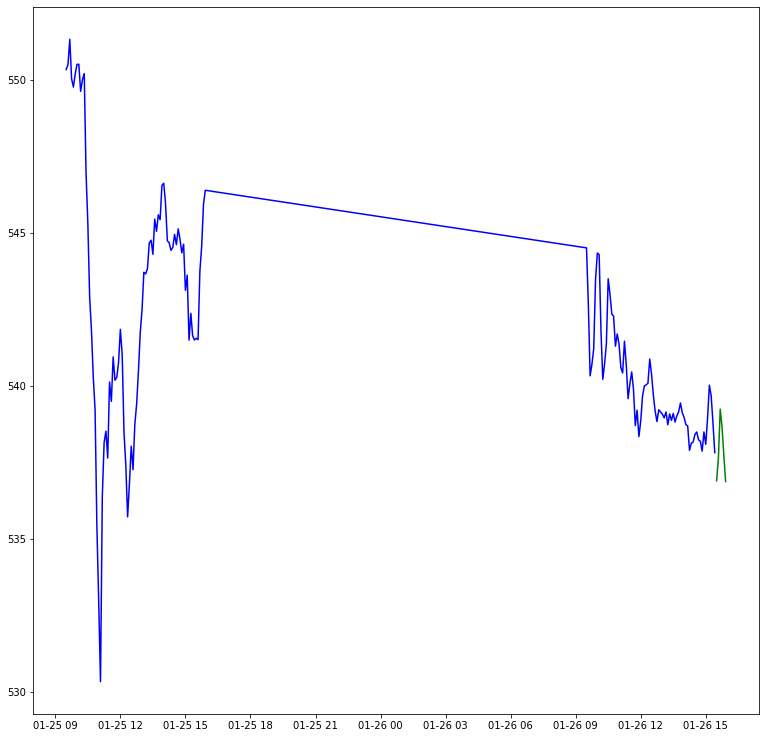

In [22]:
plt.figure(figsize=(13,13))
plt.plot(today.index.to_pydatetime(), today['Close'],color= 'b')
plt.plot(forcast.index.to_pydatetime(), forcast['predictions'],color= 'g')